In [84]:
import pandas as pd
pd.options.mode.chained_assignment = None
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [85]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('fetal_health.csv');

In [89]:
df = df[['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions', 'light_decelerations',\
        'severe_decelerations', 'prolongued_decelerations', 'abnormal_short_term_variability',\
        'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability',\
        'mean_value_of_long_term_variability', 'fetal_health']]

In [90]:
normal_count = (df['fetal_health'] == 1).sum()
suspect_count = (df['fetal_health'] == 2).sum()
pathological_count = (df['fetal_health'] == 3).sum()
print("Normal Count: ", normal_count, " Suspec Count: ", suspect_count, " Pathological Count: ", pathological_count)

Normal Count:  1655  Suspec Count:  295  Pathological Count:  176


In [91]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
model_dt = DecisionTreeClassifier()

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
model_dt.fit(X_train, y_train)
print(model_dt.score(X_train, y_train))
print(model_dt.score(X_test, y_test))
y_pred = model_dt.predict(X_test)

print("Balanced Accuracy: ", balanced_accuracy_score(y_test, y_pred))
print("f1_score macro: ", f1_score(y_test, y_pred, average='macro'))
print("f1_score micro: ",f1_score(y_test, y_pred, average='micro'))
print("f1_score weighted: ",f1_score(y_test, y_pred, average='weighted'))
print("precision_score macro: ", precision_score(y_test, y_pred, average='macro'))
print("precision_score micro: ",precision_score(y_test, y_pred, average='micro'))
print("precision_score weighted: ",precision_score(y_test, y_pred, average='weighted'))
print("recall_score macro: ", recall_score(y_test, y_pred, average='macro'))
print("recall_score micro: ",recall_score(y_test, y_pred, average='micro'))
print("recall_score weighted: ",recall_score(y_test, y_pred, average='weighted'))

1.0
0.9210526315789473
Balanced Accuracy:  0.8693065347160535
f1_score macro:  0.8599799045972434
f1_score micro:  0.9210526315789473
f1_score weighted:  0.9199050729471534
precision_score macro:  0.8554482379954077
precision_score micro:  0.9210526315789473
precision_score weighted:  0.9201408451497116
recall_score macro:  0.8693065347160535
recall_score micro:  0.9210526315789473
recall_score weighted:  0.9210526315789473


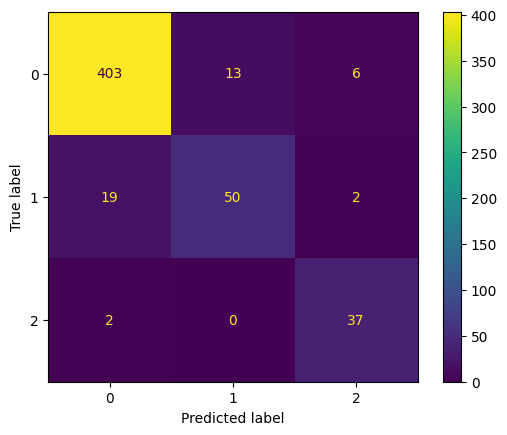

In [95]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [64]:
X.shape
X, y = load_iris(return_X_y=True)
X_new = SelectKBest(f_classif, k=4).fit_transform(X, y)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y)
model_dt.fit(X_train, y_train)
print(model_dt.score(X_train, y_train))
print(model_dt.score(X_test, y_test))

y_pred = model_dt.predict(X_test)

print("Balanced Accuracy: ", balanced_accuracy_score(y_test, y_pred))
print("f1_score macro: ", f1_score(y_test, y_pred, average='macro'))
print("f1_score micro: ",f1_score(y_test, y_pred, average='micro'))
print("f1_score weighted: ",f1_score(y_test, y_pred, average='weighted'))
print("precision_score macro: ", precision_score(y_test, y_pred, average='macro'))
print("precision_score micro: ",precision_score(y_test, y_pred, average='micro'))
print("precision_score weighted: ",precision_score(y_test, y_pred, average='weighted'))
print("recall_score macro: ", recall_score(y_test, y_pred, average='macro'))
print("recall_score micro: ",recall_score(y_test, y_pred, average='micro'))
print("recall_score weighted: ",recall_score(y_test, y_pred, average='weighted'))

1.0
0.9736842105263158
Balanced Accuracy:  0.9722222222222222
f1_score macro:  0.9740129935032483
f1_score micro:  0.9736842105263158
f1_score weighted:  0.9735658486546201
precision_score macro:  0.9777777777777779
precision_score micro:  0.9736842105263158
precision_score weighted:  0.975438596491228
recall_score macro:  0.9722222222222222
recall_score micro:  0.9736842105263158
recall_score weighted:  0.9736842105263158


Training accuracy: 0.9993726474278545
Test accuracy: 0.8571428571428571


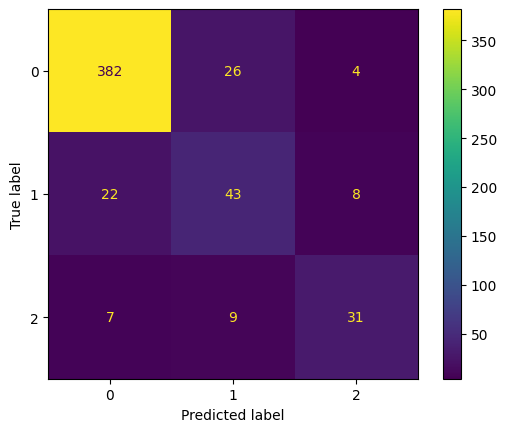

In [46]:
# Ryan's code with Decision Tree Classifier
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y)
model_dt = DecisionTreeClassifier()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
model_dt.fit(X_train_pca, y_train)
y_train_pred = model_dt.predict(X_train_pca)
y_test_pred = model_dt.predict(X_test_pca)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
cm = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(cm).plot()
print("Training accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)